# **Terrain recognition using Deep Learning**

In [ ]:
classes = ["sandy","rocky","grass","marshy"]
classes = ["sandy","rocky","grass","marshy"]
url = "https://www.bikatadventures.com/images/BlogspotContents/BlogspotImageUrl78779-Bikat-Adventures.jpg"

In [ ]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 28.0 MB/s eta 0:00:00


In [ ]:
#Do not change this
import io
from PIL import Image
import requests
from transformers import CLIPProcessor, CLIPModel
model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


Class = marshy


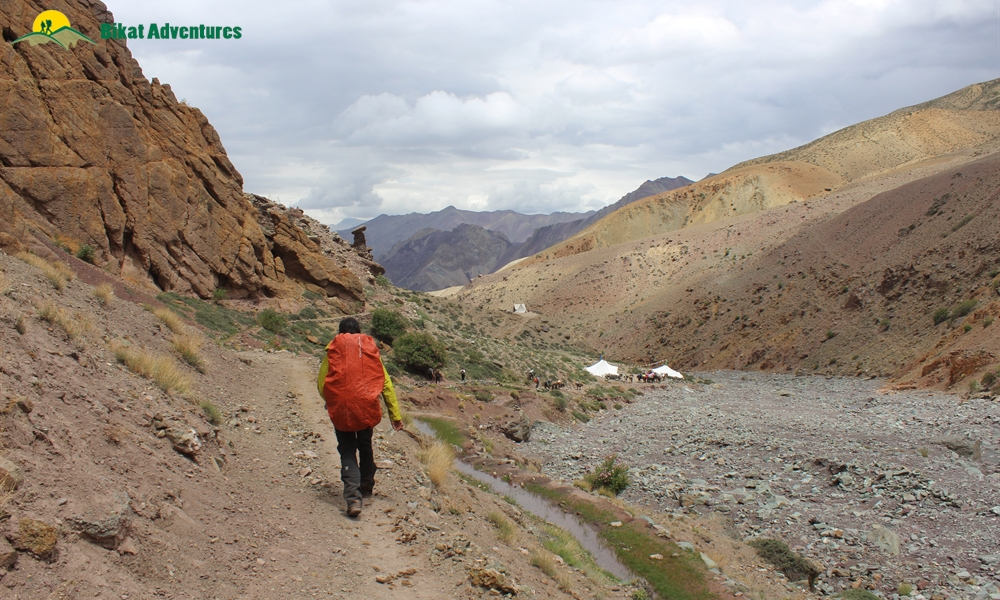

In [ ]:
image = Image.open(requests.get(url, stream=True).raw)
inputs = processor(text=classes, images=image, return_tensors="pt", padding=True)
probs = model(**inputs).logits_per_image.softmax(dim=1)
print("Class = " + classes[((probs.tolist())[0]).index(max((probs.tolist())[0]))])
image

# **Temp**

In [ ]:
import joblib
joblib.dump(model, 'model.pkl')
joblib.dump(processor, 'processor.pkl')

['processor.pkl']

In [ ]:
model = joblib.load("model.pkl")
processor = joblib.load("processor.pkl")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/model.pkl /content/drive/MyDrive/DroidCam

In [ ]:
!cp /content/processor.pkl /content/drive/MyDrive/DroidCam